In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

# load unemployment rates
data = pd.read_csv("c2_LMUNRRTTCHQ156S.csv", index_col="DATE")
data.index = pd.to_datetime(data.index, format="%Y-%m-%d")

data.shape

(197, 1)

In [2]:
data.tail()

,LMUNRRTTCHQ156S
DATE,
2018-01-01,2.880751
2018-04-01,2.656838
2018-07-01,2.544365
2018-10-01,2.446708
2019-01-01,2.393524


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 197 entries, 1970-01-01 to 2019-01-01
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   LMUNRRTTCHQ156S  197 non-null    float64
dtypes: float64(1)
memory usage: 3.1 KB


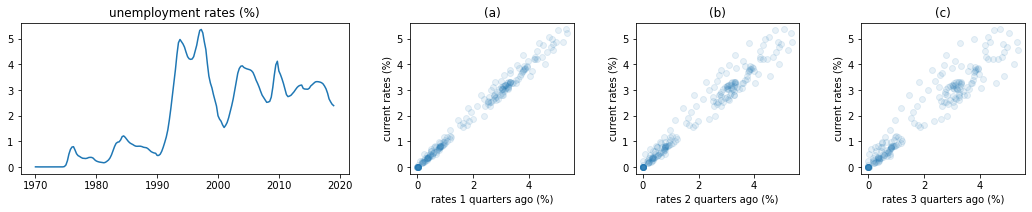

In [8]:
fig, axes = plt.subplots(
    nrows=1,
    ncols=4,
    figsize=(18, 3),
    gridspec_kw={"wspace": 0.3, "width_ratios": [2, 1, 1, 1]},
)

# the first plot on the left
axes[0].plot(data)
axes[0].set(title="unemployment rates (%)")

for (ax, lag, t) in zip(axes[1:].flatten(),     # get the axes, ignore axes[0], it is already plotted and titled 
                        [1, 2, 3],              # get the lags of 1,2 and 3 quarters in 'lag'
                        ["(a)", "(b)", "(c)"]): # get the titles in 't'

    ax.scatter(data[:-lag], data[lag:], alpha=0.1)  
    ax.set(
        xlabel="rates " + str(lag) + " quarters ago (%)",
        ylabel="current rates (%)",
        title=str(t),
    )
    
# adjust the spaces
fig.subplots_adjust(bottom=0.2, top=0.9)
plt.show()

In [9]:
from pandas.plotting import lag_plot

# load stock prices
data = pd.read_csv("c2_financial_data.csv", index_col="Date")
data.index = pd.to_datetime(data.index, format="%d.%m.%y")
prices = data["Close"]

# load GDP data
gdp = pd.read_csv("c2_CPMNACSAB1GQCH.csv", index_col="DATE")
gdp.index = pd.to_datetime(gdp.index, format="%Y-%m-%d")

#  load temperature data
temp = pd.read_csv(
    "c2_daily-min-temperatures.txt", parse_dates=["Date"], index_col="Date"
)

# generate random numbers from standard normal distribution
np.random.seed(5)
data_numbers = pd.DataFrame(
    np.random.normal(size=240),
    columns=["random_numbers"],
    index=pd.date_range("2001-jan", periods=240, freq="M"),
)

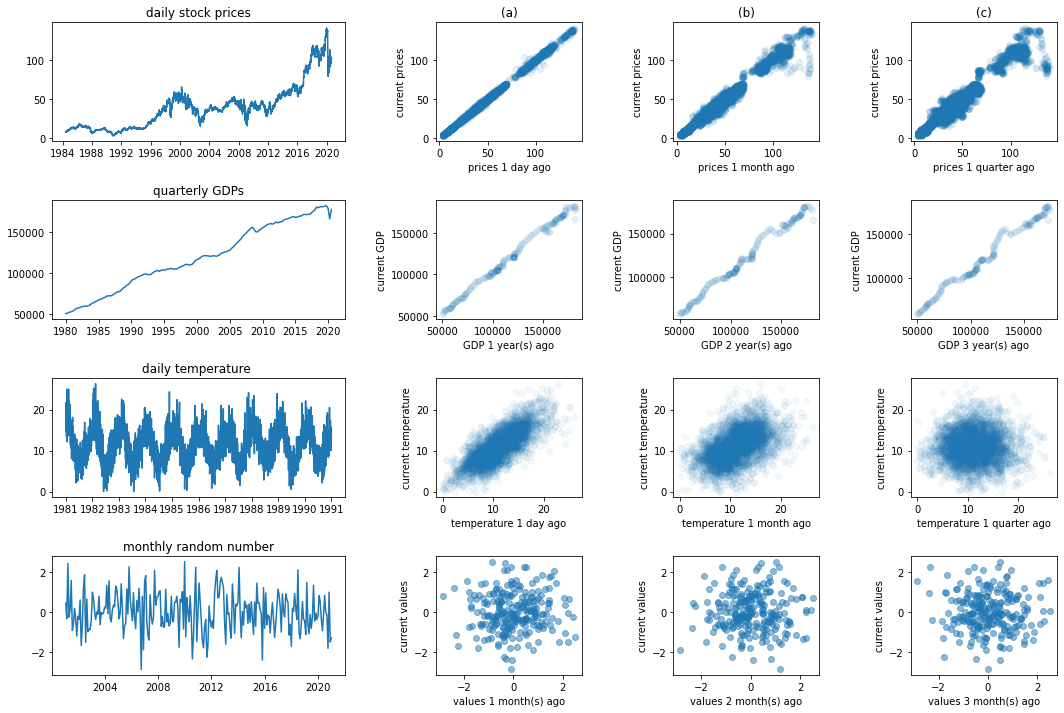

In [10]:
fig, axes = plt.subplots(
    nrows=4,
    ncols=4,
    figsize=(18, 12),
    gridspec_kw={"hspace": 0.5, "wspace": 0.5, "width_ratios": [2, 1, 1, 1]},
)

# plot data in the first column
# axes goes from row 0 to row 3, but the column remains 0
axes[0, 0].plot(prices)
axes[1, 0].plot(gdp)
axes[2, 0].plot(temp)
axes[3, 0].plot(data_numbers)

# set titles for the plots in the first column
axes[0, 0].set(title="daily stock prices")
axes[1, 0].set(title="quarterly GDPs")
axes[2, 0].set(title="daily temperature ")
axes[3, 0].set(title="monthly random number")

#  plot stock prices
for (ax, lag, _lag, t) in zip(
    axes[0, 1:].flatten(),
    [1, 21, 61],
    ["day", "month", "quarter"],
    ["(a)", "(b)", "(c)"],
):

    lag_plot(prices, lag=lag, ax=ax, alpha=0.1)
    ax.set(
        xlabel="prices 1 " + str(_lag) + " ago",
        ylabel="current prices",
        title=str(t),
    )

#  plot GDP data
for (ax, lag) in zip(axes[1, 1:].flatten(), [4, 8, 12]):

    lag_plot(gdp, lag=lag, ax=ax, alpha=0.1)
    ax.set(xlabel="GDP " + str(int(lag / 4)) + " year(s) ago", ylabel="current GDP")

#  plot temperature data
for (ax, lag, _lag) in zip(
    axes[2, 1:].flatten(), [1, 30, 90], ["day", "month", "quarter"]
):

    lag_plot(temp, lag=lag, ax=ax, alpha=0.05)
    ax.set(xlabel="temperature 1 " + str(_lag) + " ago", ylabel="current temperature")

# plot random numbers
for (ax, lag) in zip(axes[3, 1:].flatten(), [1, 2, 3]):

    lag_plot(data_numbers, lag=lag, ax=ax, alpha=0.5)
    ax.set(xlabel="values " + str(lag) + " month(s) ago", ylabel="current values")

plt.show()